<h1><center>Capstone Project -Time Series Forecasting</h1></center>

# Problem Statement

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality.

 

With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column. Note that some stores in the dataset were temporarily closed for refurbishment.

# Data
These are all the features given in the dataset along with a short description of each-


- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- DayOfWeek – the day of the week
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# CODE

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, clear_output
import ipywidgets as widgets
from ipywidgets import interact
import plotnine as p9
from plotnine import *
from plotnine.data import *
p9.options.figure_size = (15, 10)

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
train = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')

In [3]:
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [4]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [5]:
# Printing shape of Data
print(train.shape)
print(store.shape)

(1017209, 9)
(1115, 10)


In [6]:
# Describing the data
print("Describing Train Data : ")
print(train.describe(include='all'))
print("Describing Store Data : ")
print(store.describe(include='all'))

Describing Train Data : 
               Store     DayOfWeek        Date         Sales     Customers  \
count   1.017209e+06  1.017209e+06     1017209  1.017209e+06  1.017209e+06   
unique           NaN           NaN         942           NaN           NaN   
top              NaN           NaN  2015-07-31           NaN           NaN   
freq             NaN           NaN        1115           NaN           NaN   
mean    5.584297e+02  3.998341e+00         NaN  5.773819e+03  6.331459e+02   
std     3.219087e+02  1.997391e+00         NaN  3.849926e+03  4.644117e+02   
min     1.000000e+00  1.000000e+00         NaN  0.000000e+00  0.000000e+00   
25%     2.800000e+02  2.000000e+00         NaN  3.727000e+03  4.050000e+02   
50%     5.580000e+02  4.000000e+00         NaN  5.744000e+03  6.090000e+02   
75%     8.380000e+02  6.000000e+00         NaN  7.856000e+03  8.370000e+02   
max     1.115000e+03  7.000000e+00         NaN  4.155100e+04  7.388000e+03   

                Open         Promo Sta

In [7]:
# Printing number of nulls in train
print(train.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


# Data Preparation

In [8]:
train = pd.merge(train, store, on = 'Store', how = 'left')

In [9]:
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

In [10]:
print(train.dtypes)

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [11]:
# Data Type Conversions
train['Date'] = pd.to_datetime(train['Date'], format= '%Y-%m-%d')
print(train['Date'].min(), train['Date'].max())

2013-01-01 00:00:00 2015-07-31 00:00:00


In [12]:
# Replacing 0 with nulls when store is closed for refurbishment, which would be imputed later
train['Sales'] = np.where(train['Open'] == 1, train['Sales'], np.nan)
train['Customers'] = np.where(train['Open'] == 1, train['Customers'], np.nan)

In [13]:
# Replacing StateHoliday with numbers 
train['StateHoliday'] = train['StateHoliday'].astype(str)
train['StateHoliday'] = train['StateHoliday'].replace({'0':'0','a':'1','b':'2','c':'3'})
train['StateHoliday'] = train['StateHoliday'].astype(int)
train['StateHoliday'].unique()

array([0, 1, 2, 3])

In [14]:
# Replacing StoreType with numbers 
train['StoreType'] = train['StoreType'].astype(str)
train['StoreType'] = train['StoreType'].replace({'a':'0','b':'1','c':'2','d':'3'})
train['StoreType'] = train['StoreType'].astype(int)
train['StoreType'].unique()

array([2, 0, 3, 1])

In [15]:
#Replacing Assortment with numbers 
train['Assortment'] = train['Assortment'].astype(str)
train['Assortment'] = train['Assortment'].replace({'a':'0','b':'1','c':'2'})
train['Assortment'] = train['Assortment'].astype(int)
train['Assortment'].unique()

array([0, 2, 1])

In [16]:
# Replacing PromoInterval with numbers 
train['PromoInterval'] = train['PromoInterval'].astype(str)
train['PromoInterval'] = train['PromoInterval'].replace({'Jan,Apr,Jul,Oct':'0','Feb,May,Aug,Nov':'1','Mar,Jun,Sept,Dec':'2'})
train['PromoInterval'] = train['PromoInterval'].astype(float)
train['PromoInterval'].unique()

array([nan,  0.,  1.,  2.])

In [17]:
def derive_features(pdf):
    
    # Date Features
    pdf['year'] = pd.DatetimeIndex(pdf['Date']).year
    pdf['month'] = pd.DatetimeIndex(pdf['Date']).month
    pdf['quarter'] = pd.DatetimeIndex(pdf['Date']).quarter
    
    pdf['day'] = pd.DatetimeIndex(pdf['Date']).day
    
    pdf['is_sunday'] = [1 if pdf['DayOfWeek'].iloc[i] == 6 else 0 for i in range(pdf.shape[0])]
    pdf['is_monday'] = [1 if pdf['DayOfWeek'].iloc[i] == 0 else 0 for i in range(pdf.shape[0])]
       
    pdf['weekofyear'] = pd.DatetimeIndex(pdf['Date']).weekofyear
    pdf['is_month_end'] = pd.DatetimeIndex(pdf['Date']).is_month_end.astype(int)
    pdf['is_month_start'] = pd.DatetimeIndex(pdf['Date']).is_month_start.astype(int)

    pdf['is_quarter_end'] = pd.DatetimeIndex(pdf['Date']).is_quarter_end.astype(int)
    pdf['is_quarter_start'] = pd.DatetimeIndex(pdf['Date']).is_quarter_start.astype(int)
    
    pdf['is_year_end'] = pd.DatetimeIndex(pdf['Date']).is_year_end.astype(int)
    pdf['is_year_start'] = pd.DatetimeIndex(pdf['Date']).is_year_start.astype(int)
    
    return pdf

train = derive_features(train)

In [18]:
train.head()

Store  DayOfWeek       Date    Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263.0      555.0     1      1             0   
1      2          5 2015-07-31   6064.0      625.0     1      1             0   
2      3          5 2015-07-31   8314.0      821.0     1      1             0   
3      4          5 2015-07-31  13995.0     1498.0     1      1             0   
4      5          5 2015-07-31   4822.0      559.0     1      1             0   

   SchoolHoliday  StoreType  ...  day  is_sunday  is_monday  weekofyear  \
0              1          2  ...   31          0          0          31   
1              1          0  ...   31          0          0          31   
2              1          0  ...   31          0          0          31   
3              1          2  ...   31          0          0          31   
4              1          0  ...   31          0          0          31   

   is_month_end  is_month_start  is_quarter_end  is_quarter_start  \
0             1               0               0                 0   
1             1               0               0                 0   
2             1               0               0                 0   
3             1               0               0                 0   
4             1               0               0                 0   

   is_year_end  is_year_start  
0            0              0  
1            0              0  
2            0              0  
3            0              0  
4            0              0  

[5 rows x 31 columns]

In [19]:
print(train.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                               float64
Customers                           float64
Open                                  int64
Promo                                 int64
StateHoliday                          int32
SchoolHoliday                         int64
StoreType                             int32
Assortment                            int32
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                       float64
year                                  int64
month                                 int64
quarter                               int64
day                                   int64
is_sunday                       

In [20]:
# Sorting the DF based on Store and Date
train = train.sort_values(['Store', 'Date']).reset_index(drop = True)

# EDA

### Univariate Analysis

<AxesSubplot:xlabel='Date'>

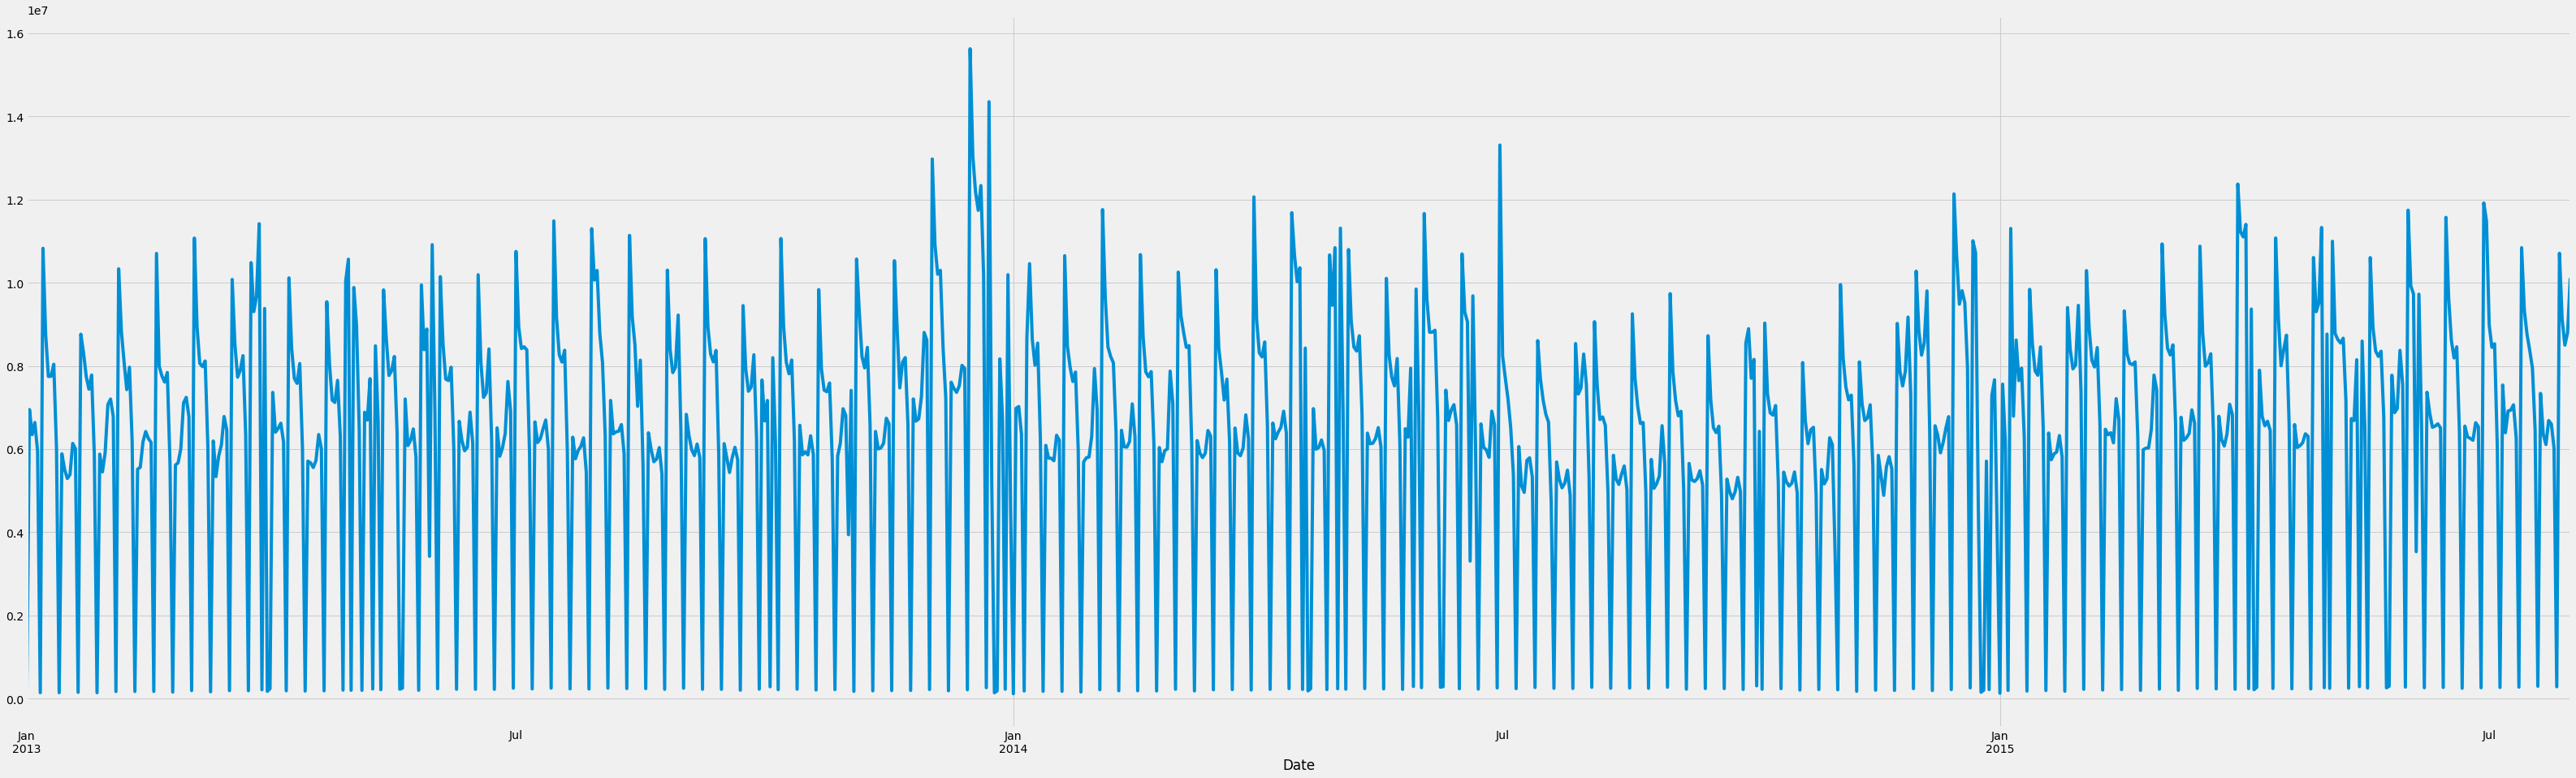

In [21]:
# Time Series plot of Sales
train.groupby('Date').Sales.sum().plot(figsize = (50,15))

<AxesSubplot:xlabel='Date'>

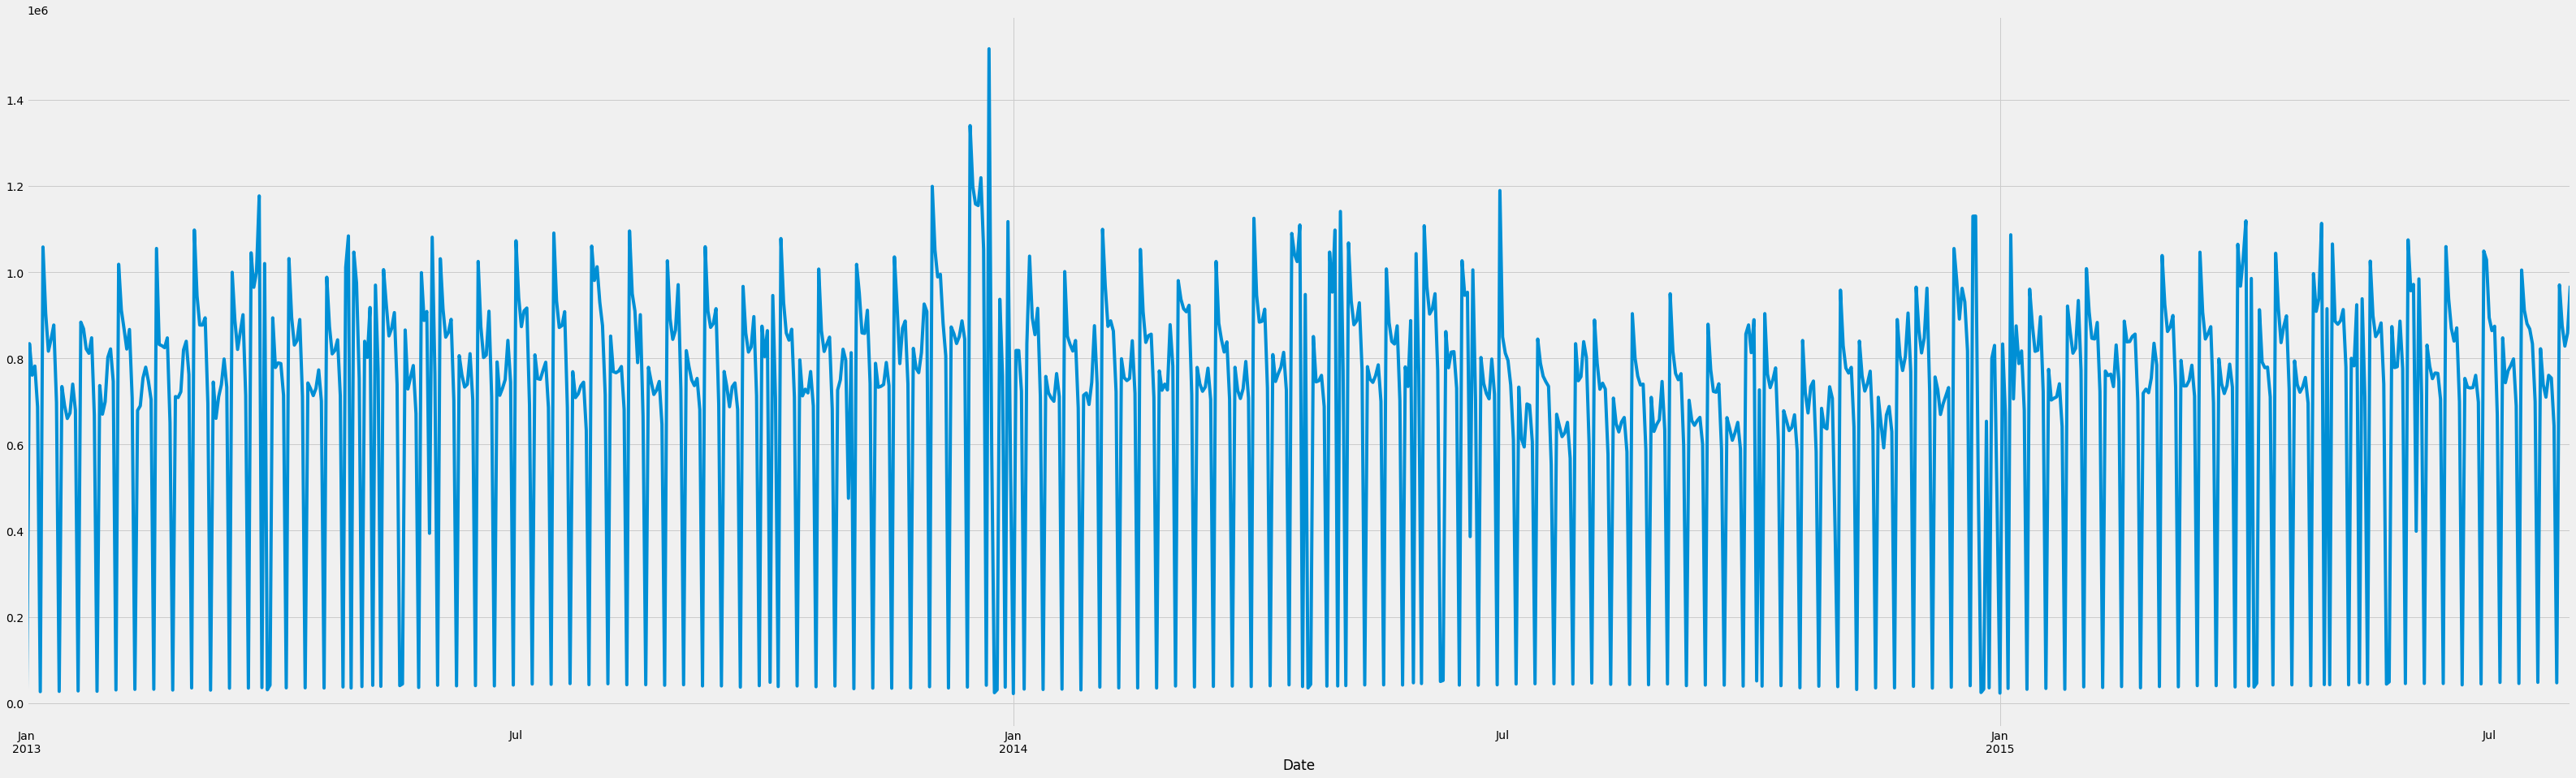

In [22]:
# Time Series plot of Customers
train.groupby('Date').Customers.sum().plot(figsize = (50,15))

In [23]:
# Sales distribution for each selected store
def plot_store_dist(store):
    """
    Print the current widget value in short sentence
    """

    sns.distplot(train[train.Store.astype(str) == str(store)]['Sales'].dropna())
    plt.title('Sales for Store : ' + str(store))
    plt.show()
   
widgets.interact(plot_store_dist, store=train.Store.astype(str).unique());


interactive(children=(Dropdown(description='store', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'…

In [24]:
# Cuastomer Distribution for each selected store
def plot_store_dist(store):
    """
    Print the current widget value in short sentence
    """

    sns.distplot(train[train.Store.astype(str) == str(store)]['Customers'].dropna())
    plt.title('Customers for Store : ' + str(store))
    plt.show()
   
widgets.interact(plot_store_dist, store=train.Store.astype(str).unique());


interactive(children=(Dropdown(description='store', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'…

In [25]:
# Time Series plot for Sales for each selected store considering only open days
def plot_store_dist(store):
    """
    Print the current widget value in short sentence
    """

    train[(train.Store.astype(str) == str(store)) & (train.Open != 0)].groupby('Date').Sales.sum().plot(figsize = (50,12))
    plt.title('Sales for Store over time : ' + str(store))
    plt.show()
   
widgets.interact(plot_store_dist, store=train.Store.astype(str).unique());


interactive(children=(Dropdown(description='store', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'…

In [26]:
# Time Series plot for Customers for each selected store considering only open days
def plot_store_dist(store):
    """
    Print the current widget value in short sentence
    """

    train[(train.Store.astype(str) == str(store)) & (train.Open != 0)].groupby('Date').Customers.sum().plot(figsize = (50,12))
    plt.title('Customers for Store over time : ' + str(store))
    plt.show()
   
widgets.interact(plot_store_dist, store=train.Store.astype(str).unique());

interactive(children=(Dropdown(description='store', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'…

In [27]:
# Auto-Correlation plot for each time series of Sales for each Store
def plot_store_dist(store):
    """
    Print the current widget value in short sentence
    """
    ts = train[train.Store.astype(str) == str(store)].groupby('Date').Sales.sum()
    sm.graphics.tsa.plot_acf(ts.values.squeeze(), lags=40)
    plt.title('ACF Plot for Store  : ' + str(store))
    plt.show()
   
widgets.interact(plot_store_dist, store=train.Store.astype(str).unique());


interactive(children=(Dropdown(description='store', options=('1', '2', '3', '4', '5', '6', '7', '8', '9', '10'…

### Bi-Variate analysis

In [28]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'quarter', 'day',
       'is_sunday', 'is_monday', 'weekofyear', 'is_month_end',
       'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end',
       'is_year_start'],
      dtype='object')

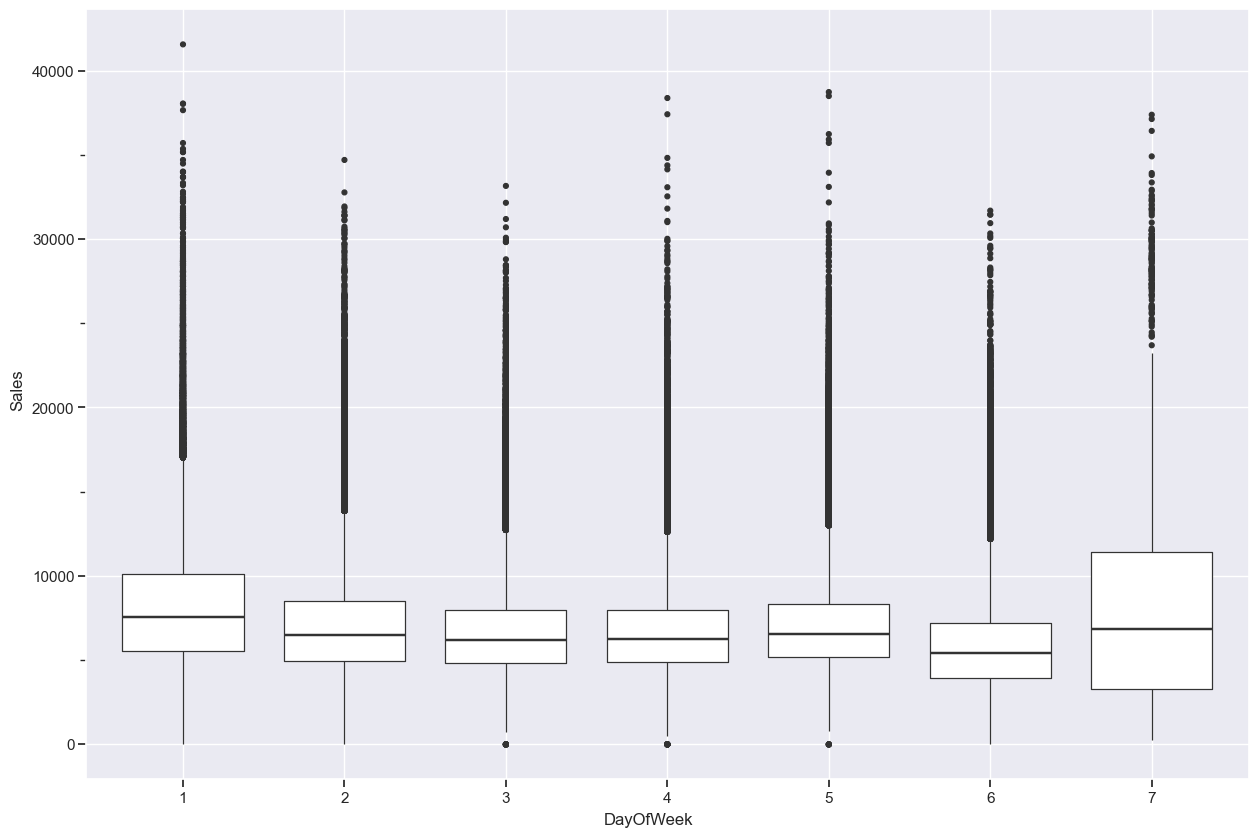

<ggplot: (139071798721)>

In [29]:
# Sales Distribution across DayOfWeeek
(
    ggplot(train)
    + geom_boxplot(aes(x='factor(DayOfWeek)', y='Sales'))
    + scale_x_discrete(name='DayOfWeek')  # change ticks labels on OX
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

In [30]:
# Sales Distribution across StoreType
(
    ggplot(train)
    + geom_boxplot(aes(x='factor(StoreType)', y='Sales'))
    + scale_x_discrete(name='StoreType')  # change ticks labels on OX
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

<ggplot: (139077997306)>

In [31]:
# Time Series plot across Store Type
ts = train.groupby(['StoreType','Date']).Sales.sum().reset_index()
x = train[['Date','SchoolHoliday']]
x['SchoolHoliday'] = x['SchoolHoliday'].astype(str)
x = x[x.SchoolHoliday == '1']
(
    ggplot(ts, aes(x='Date', y='Sales'))
    + geom_line() # line plot
    + labs(x='Date', y='Sales')
    + facet_grid('StoreType ~ .', labeller = 'label_both')
    + geom_vline(x, aes(xintercept='Date', color='SchoolHoliday'), alpha=0.4)
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

<ggplot: (139075947816)>

In [32]:
# Sales Distribution across CompettionOpenSinceYear
(
    ggplot(train)
    + geom_boxplot(aes(x='factor(CompetitionOpenSinceYear)', y='Sales'))
    + scale_x_discrete(name='CompetitionOpenSinceYear')  # change ticks labels on OX
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

<ggplot: (139075988839)>

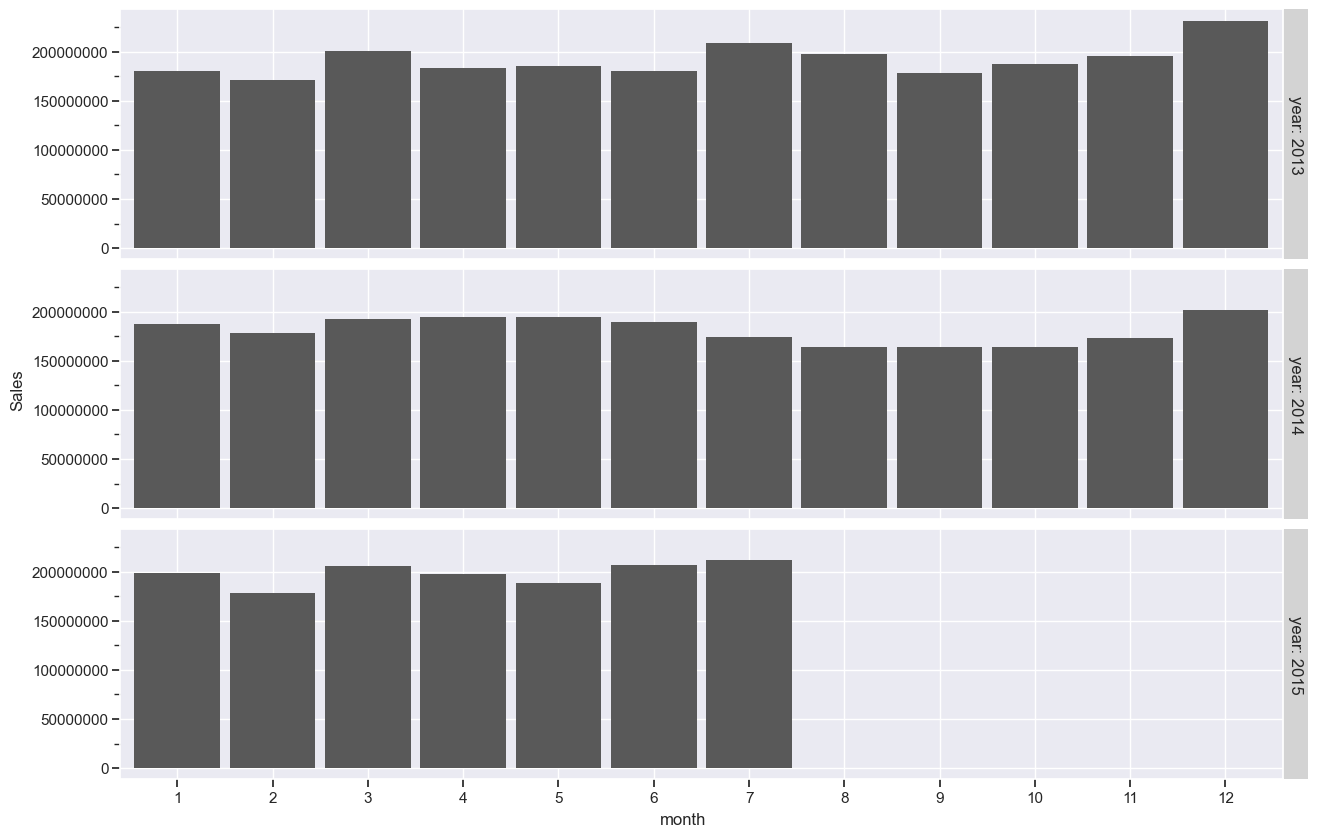

<ggplot: (139082728123)>

In [33]:
# Sales across months and year
(
    ggplot(train.groupby(['year','month']).Sales.sum().reset_index())
    + geom_col(aes(x='factor(month)', y='Sales'))
    + scale_x_discrete(name='month')  # change ticks labels on OX
    + facet_grid('year ~ .', labeller = 'label_both')
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

In [34]:
# Sales across day of month
(
    ggplot(train.groupby('day').Sales.sum().reset_index())
    + geom_col(aes(x='factor(day)', y='Sales'))
    + scale_x_discrete(name='day')  # change ticks labels on OX
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

<ggplot: (139080943496)>

In [35]:
# Sales across week of year
(
    ggplot(train.groupby(['year','weekofyear']).Sales.sum().reset_index())
    + geom_col(aes(x='factor(weekofyear)', y='Sales'))
    + scale_x_discrete(name='weekofyear')  # change ticks labels on OX
    + facet_grid('year ~ .', labeller = 'label_both')
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

<ggplot: (139082814654)>

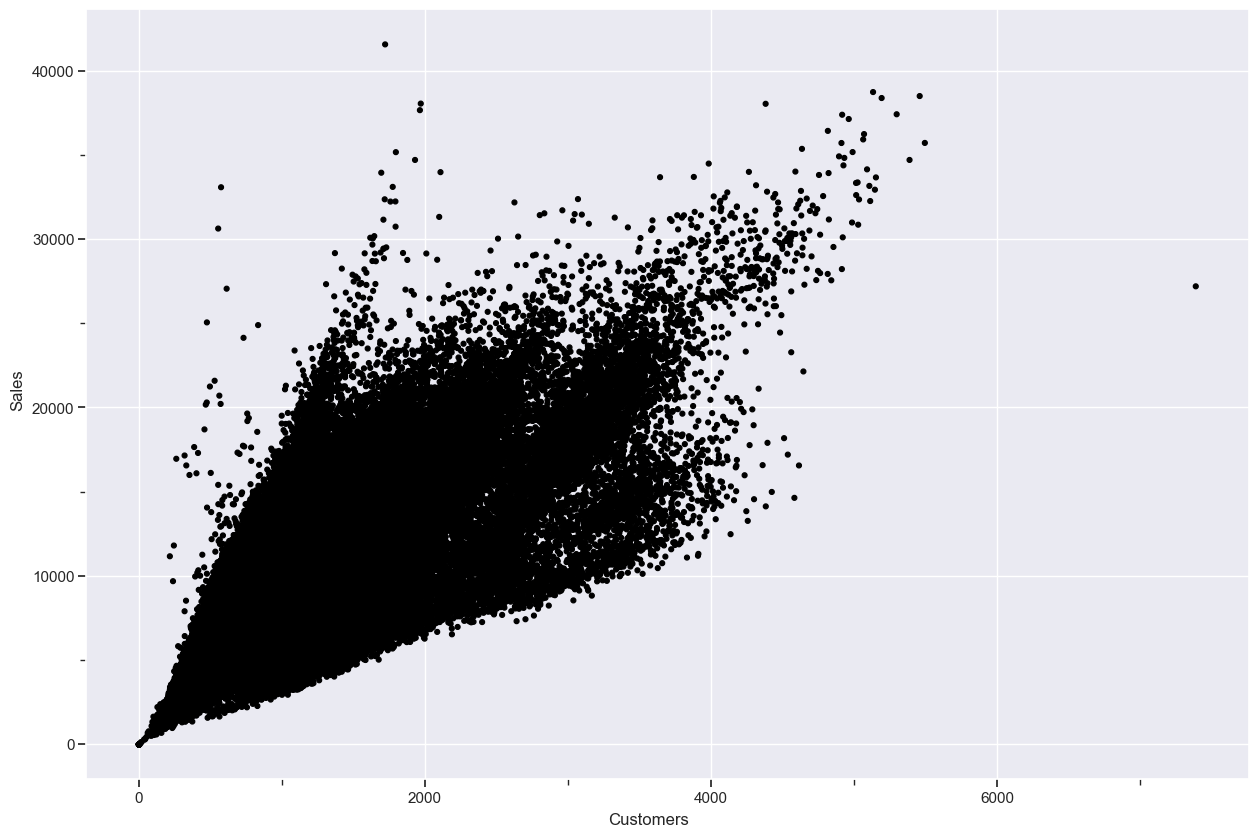

<ggplot: (139082976711)>

In [36]:
# Relationship between Sales and Customers
(
    ggplot(train, aes(x='Customers', y='Sales'))
    + geom_point()
    + xlab('Customers')
    + ylab('Sales')
    + p9.themes.theme_seaborn(style = 'darkgrid')
)

### Multi-Variate Analysis

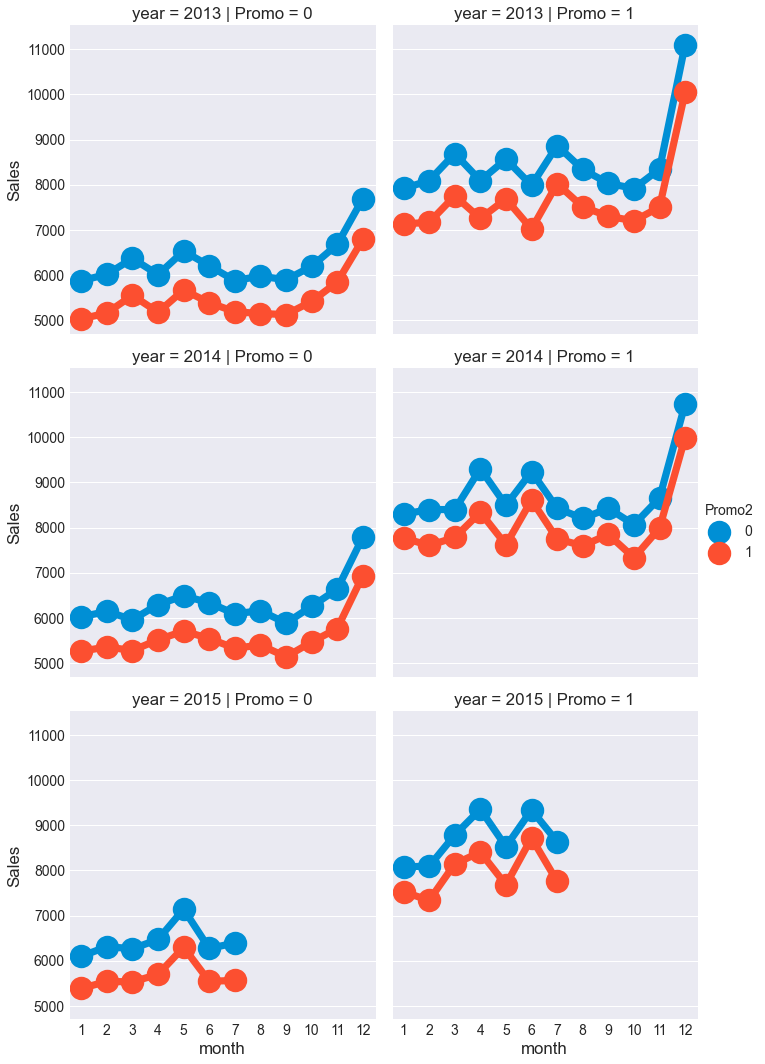

In [37]:
sns.set_style("darkgrid")

sns.factorplot(data = train, x ="month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "year"
             )

## Analysis

- There is a lot of variance at the overall(aggregate) level of time series, but as we come to the store-level, the pattern seems to be holding up.
- Some stores weekly pattern, some of them show monthly and rest show fort-nightly pattern.
- Distribution of sales vary across stores, with some store having left tailed distribution and some stores having right tailed distribution.
- Some of the stores are closed for a longer time due to refurbishment.
- Most of the stores are closed on state holidays.
- There seems to be a clear seasonality in store level time series from the ACF plot shown above.
- DayOfWeek 7 and 1 consists of highest sales.
- Store Type plays an important role in predicting sales and Store Type "b" has the highest sales.
- Stores have the highest sales in December
- Stores have the highest sales in 51st week of the year.
- Customer impact the sales linearly which is a trivial fact. So, we may need to predict footfall before predicting Sales to get better performance.

# Modelling

### Train Window : 2013-01-01 to 2015-06-19
### Test Window : 2015-06-19 to 2015-07-31 (6 Weeks i.e 42  days)

In [38]:
# Before Imputation for Store 292
train[train.Store == 292].fillna(-1000).sort_values('Date').iloc[:100,:].groupby('Date').Sales.sum().plot(figsize = (50,12))

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date', ylabel='Sales'>

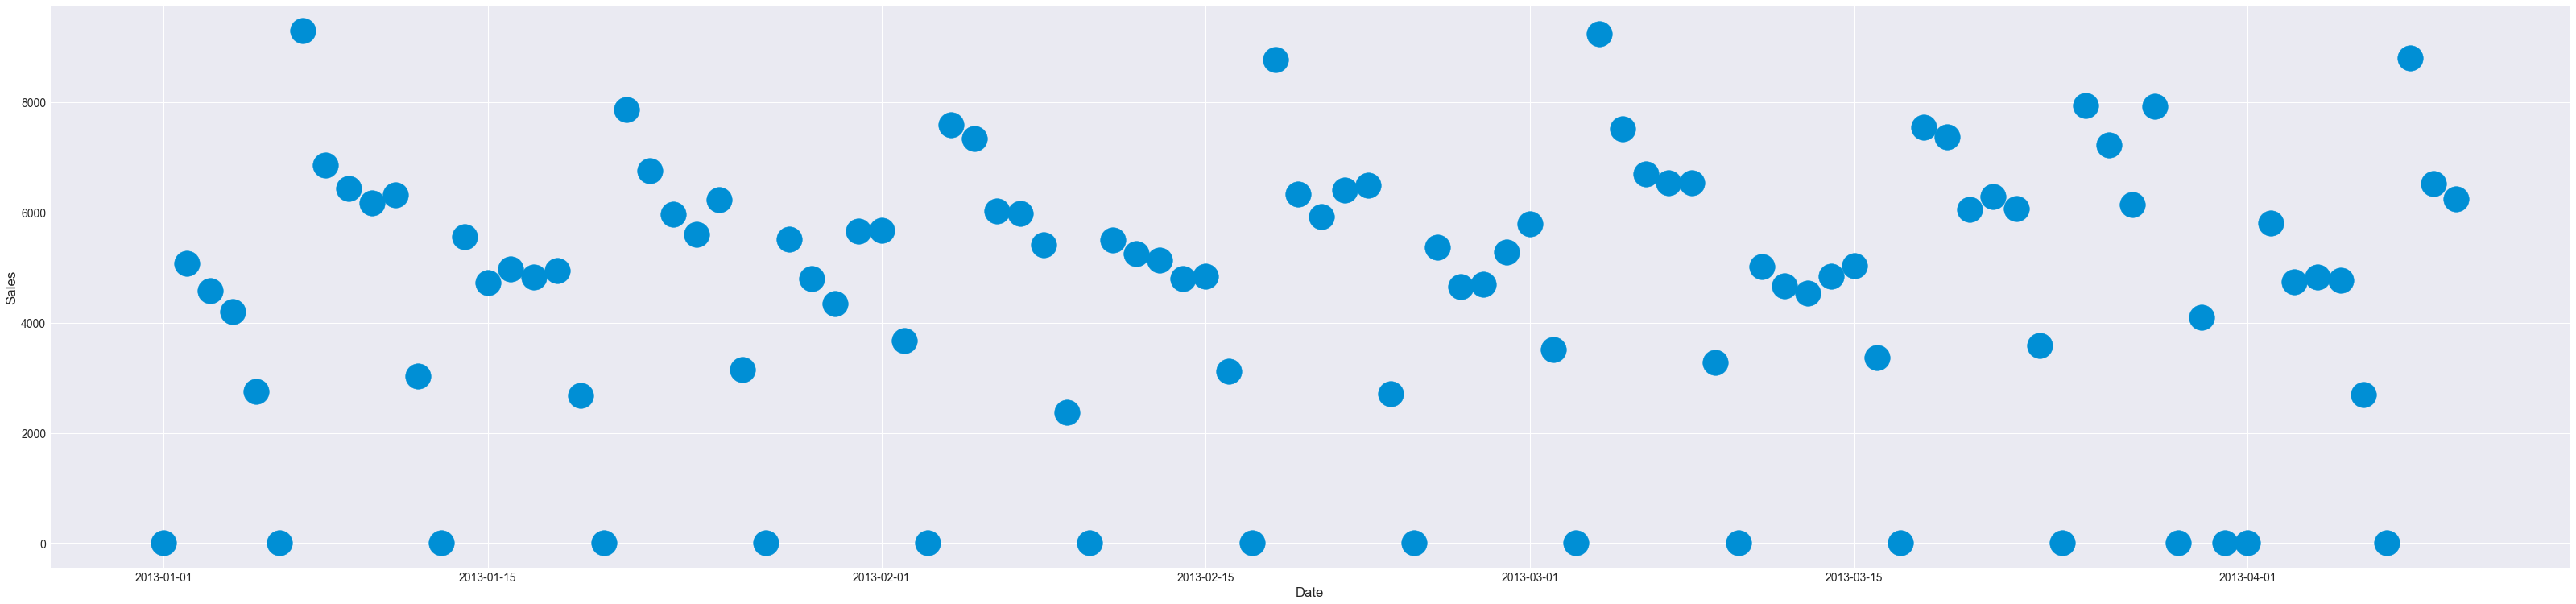

In [39]:
# Bfore Imputation for Store 292
train[train.Store == 292].sort_values('Date').iloc[:100,:].groupby('Date').Sales.sum().reset_index().plot.scatter(x = 'Date', y = 'Sales',figsize = (50,12), s = 1000)

In [40]:
# Imputing only missing sales data due to Store refurbishment with moving averages of 21 days
train['Sales'] = train.groupby(['Store'])['Sales'].apply(lambda x: x.fillna(x.rolling(21,min_periods=1).mean()))
# If NaN still persists fill with forward and then backward
train['Sales'] = train.groupby(['Store'])['Sales'].apply(lambda x: x.fillna(x.ffill()))
train['Sales'] = train.groupby(['Store'])['Sales'].apply(lambda x: x.fillna(x.bfill()))

In [41]:
# After Imputation for Store 292
train[train.Store == 292].fillna(-1000).sort_values('Date').iloc[:100,:].groupby('Date').Sales.sum().plot(figsize = (50,12))

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date', ylabel='Sales'>

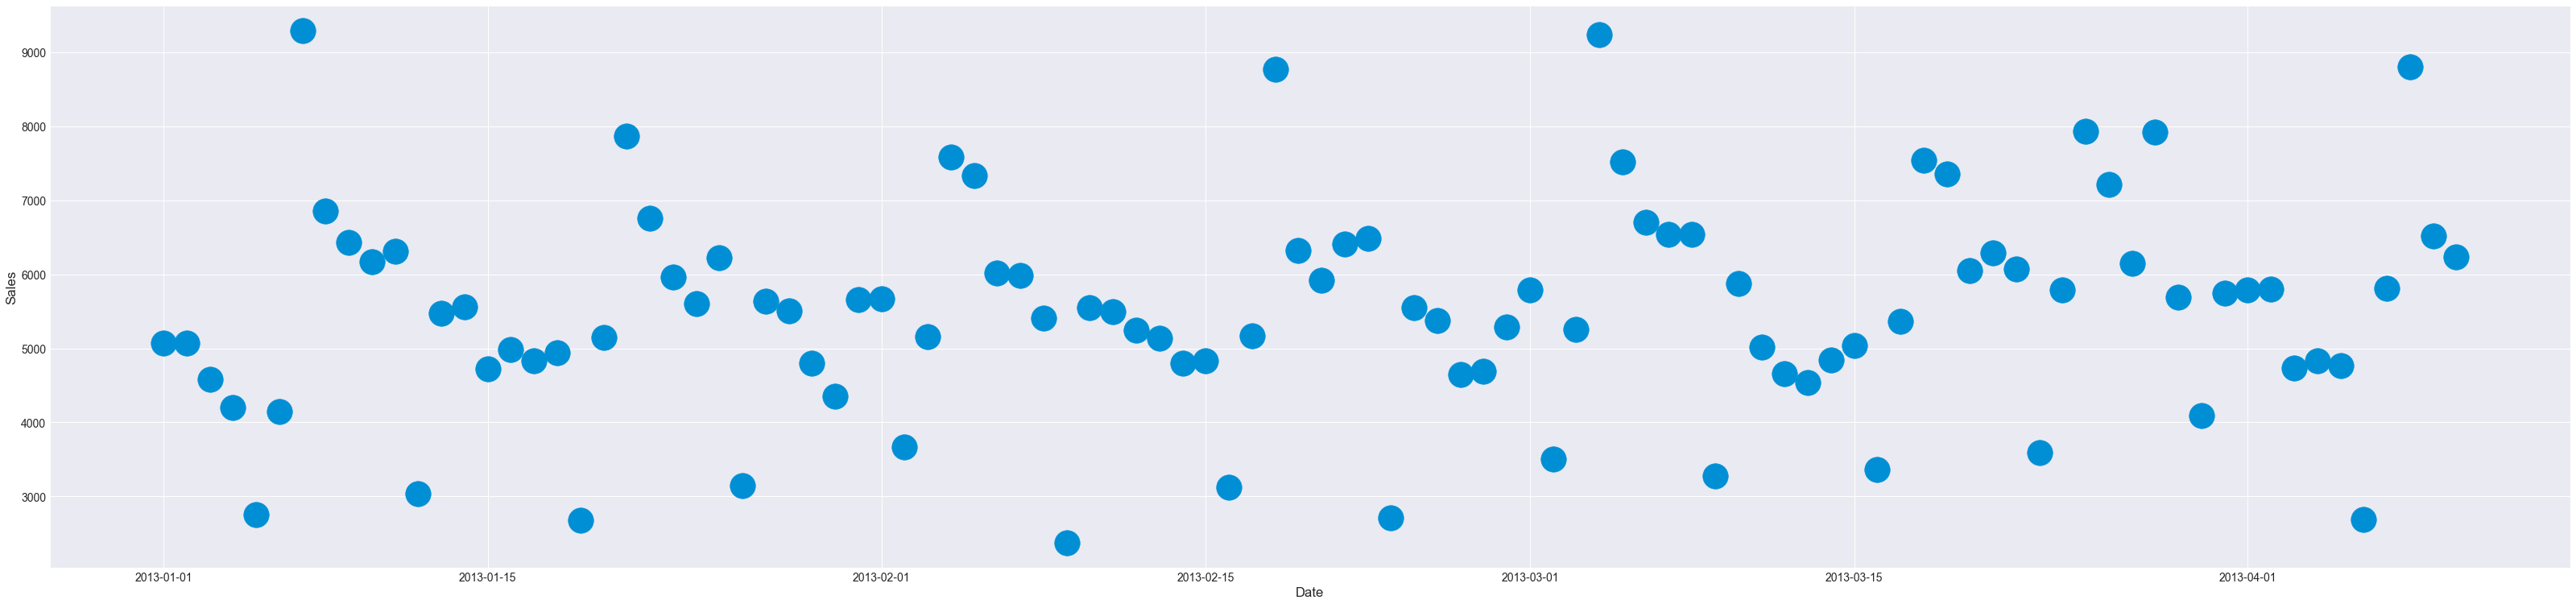

In [42]:
# After Imputation for Store 292
train[train.Store == 292].fillna(-1000).sort_values('Date').iloc[:100,:].groupby('Date').Sales.sum().reset_index().plot.scatter(x = 'Date', y = 'Sales',figsize = (50,12), s = 1000)

In [43]:
train.tail()

Store  DayOfWeek       Date    Sales  Customers  Open  Promo  \
1017204   1115          1 2015-07-27  10712.0      608.0     1      1   
1017205   1115          2 2015-07-28   8093.0      500.0     1      1   
1017206   1115          3 2015-07-29   7661.0      473.0     1      1   
1017207   1115          4 2015-07-30   8405.0      502.0     1      1   
1017208   1115          5 2015-07-31   8680.0      538.0     1      1   

         StateHoliday  SchoolHoliday  StoreType  ...  day  is_sunday  \
1017204             0              1          3  ...   27          0   
1017205             0              1          3  ...   28          0   
1017206             0              1          3  ...   29          0   
1017207             0              1          3  ...   30          0   
1017208             0              1          3  ...   31          0   

         is_monday  weekofyear  is_month_end  is_month_start  is_quarter_end  \
1017204          0          31             0               0               0   
1017205          0          31             0               0               0   
1017206          0          31             0               0               0   
1017207          0          31             0               0               0   
1017208          0          31             1               0               0   

         is_quarter_start  is_year_end  is_year_start  
1017204                 0            0              0  
1017205                 0            0              0  
1017206                 0            0              0  
1017207                 0            0              0  
1017208                 0            0              0  

[5 rows x 31 columns]

In [44]:
# Winsorizing Outliers at 99th percentile 
sales_clipped = train.groupby('Store').Sales.apply(lambda x: np.where(x > np.percentile(x, 99), np.percentile(x, 99), x)).reset_index().explode('Sales')
sales_clipped.columns = ['Store','Sales_Clipped']
train['Sales_Clipped'] = sales_clipped['Sales_Clipped'].reset_index(drop = True)
train['Sales'] = train['Sales_Clipped']
train = train.drop('Sales_Clipped', axis = 1)

In [45]:
# Splitting into Train and Test
train_sales = train[(train.Date <= '2015-06-19')]
test_sales = train[(train.Date > '2015-06-19')]
print('Train Shape : ', train_sales.shape)
print('Test Shape : ', test_sales.shape)

Train Shape :  (970379, 31)
Test Shape :  (46830, 31)


In [46]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

### Time Series Modelling using Traditional Statistical Methods

In [47]:
# Stationarity Check
from statsmodels.tsa.stattools import adfuller
stationarity_check = train_sales.groupby('Store').Sales.apply(list).apply(adfuller).apply(lambda x : x[1])
print('Number of Store Time Series having Stational Time Series are : ', (stationarity_check[stationarity_check < 0.05].count()))

Number of Store Time Series having Stational Time Series are :  1044


In [48]:
np.asarray(train_sales[train_sales.Store ==1].groupby('Date').Sales.sum().plot(figsize = (50,12)))

array(<AxesSubplot:xlabel='Date'>, dtype=object)

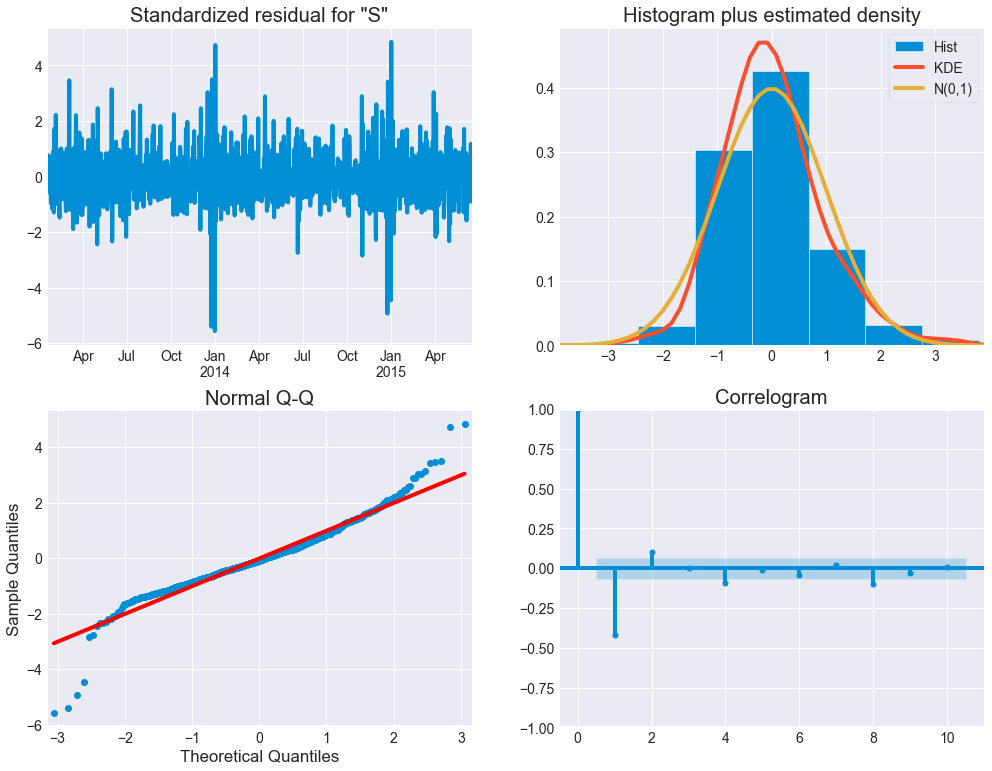

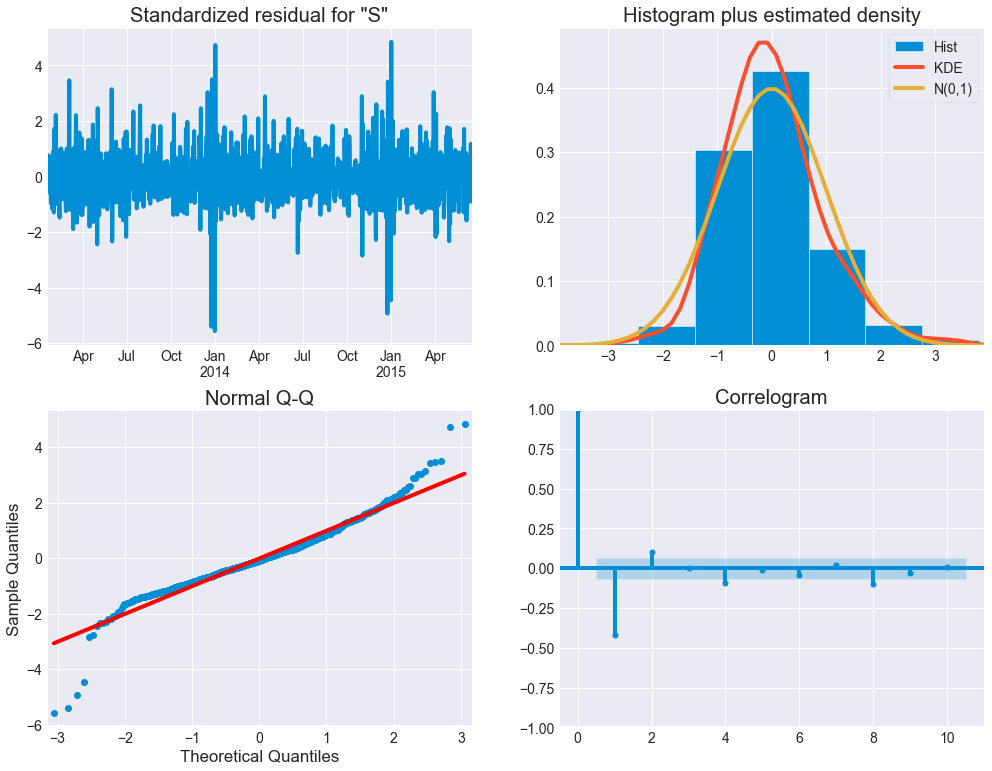

In [49]:
mod = sm.tsa.statespace.SARIMAX(train_sales[train_sales.Store ==1].groupby('Date').Sales.sum().astype('float'),
                                            order=(0, 1, 0),
                                            seasonal_order=(0, 1, 1, 12),
                                            enforce_stationarity=True)
results = mod.fit()
results.plot_diagnostics(figsize=(15, 12))

In [50]:
pred = results.get_prediction(start = pd.to_datetime("2015-06-20"), end = pd.to_datetime("2015-07-31"),dynamic = False) 

In [51]:
pred.predicted_mean.plot(label = "One-step ahead FC", alpha = 1)

<AxesSubplot:>

In [52]:
# Print the error:
print("Test MAPE: %.3f" % mean_absolute_percentage_error(test_sales[test_sales.Store == 1].Sales, pred.predicted_mean))

Test MAPE: 12.642


In [53]:
error_metric_list = []
for store in train_sales.Store.unique():
    try:
        mod = sm.tsa.statespace.SARIMAX(train_sales[train_sales.Store == store].groupby('Date').Sales.sum().astype('float'),
                                                order=(0, 1, 0),
                                                seasonal_order=(0, 1, 1, 12),
                                                enforce_stationarity=True)
        results = mod.fit()
        pred = results.get_prediction(start = test_sales[test_sales.Store == store].Date.min(), end = test_sales[test_sales.Store == store].Date.max(),dynamic = False).predicted_mean
        error = mean_absolute_percentage_error(test_sales[test_sales.Store == store].Sales.values, pred)
        print('Store :' , str(store), error)
        error_metric_list.append(error)
    except:
        print('Error in Modelling Store :' , str(store))

Store : 1 12.641553242946147
Store : 2 24.178513774849307
Store : 3 31.3950748301082
Store : 4 12.147228103482137
Store : 5 52.72330114477448
Store : 6 35.29312795178971
Store : 7 20.81134059555541
Store : 8 29.503006749723014
Store : 9 20.298240442979658
Store : 10 14.407861596105992
Store : 11 15.246104604245728
Store : 12 30.595184121949302
Error in Modelling Store : 13
Store : 14 30.07813736227552
Store : 15 29.221077829741176
Store : 16 21.539617326239956
Store : 17 43.57548983442103
Store : 18 32.67047679054121
Store : 19 41.55011593648458
Error in Modelling Store : 20
Store : 21 47.56783740417917
Error in Modelling Store : 22
Store : 23 33.17025996181523
Store : 24 31.157790635674914
Store : 25 16.51592772909977
Store : 26 25.254915664626438
Store : 27 34.86139467006953
Store : 28 43.65813679111679
Store : 29 23.175501182549453
Store : 30 16.093179491946845
Store : 31 16.190534142795794
Error in Modelling Store : 32
Store : 33 13.381886823502247
Store : 34 13.842888400989361
Sto

Store : 273 28.65265844128329
Store : 274 14.149979281797991
Error in Modelling Store : 275
Store : 276 24.7628048362759
Error in Modelling Store : 277
Store : 278 25.414531337273537
Error in Modelling Store : 279
Store : 280 18.000544599909084
Store : 281 34.90735122217436
Store : 282 17.445349117294732
Error in Modelling Store : 283
Error in Modelling Store : 284
Store : 285 14.08378099909085
Store : 286 54.34588202530249
Error in Modelling Store : 287
Error in Modelling Store : 288
Store : 289 19.264103413532503
Store : 290 24.866811401413003
Store : 291 30.128123760638818
Store : 292 87.60161808012639
Store : 293 21.579630916243314
Store : 294 21.560135203811125
Store : 295 14.940064541832893
Store : 296 22.48242018413169
Store : 297 26.94457338654996
Error in Modelling Store : 298
Store : 299 27.545673599178755
Store : 300 18.639320564517906
Store : 301 18.708809317803468
Store : 302 39.93562370812141
Store : 303 25.074992515289512
Store : 304 19.88497480912884
Store : 305 24.2978

Store : 541 23.11227220674697
Error in Modelling Store : 542
Store : 543 51.35742875630254
Store : 544 20.704563302840047
Store : 545 27.420171992336183
Store : 546 12.037269498090565
Error in Modelling Store : 547
Store : 548 39.601351702686436
Store : 549 25.18356117990419
Store : 550 28.25061462282515
Store : 551 19.282679712640434
Store : 552 47.31821913826751
Store : 553 19.77273002338478
Store : 554 11.47446224009517
Error in Modelling Store : 555
Store : 556 18.76000309890548
Store : 557 18.312358481644264
Store : 558 20.994727550888964
Store : 559 42.19247500122843
Store : 560 15.26561092333707
Store : 561 33.52014187297279
Store : 562 16.812219121307344
Store : 563 16.45826968424289
Store : 564 21.577408748043485
Store : 565 24.26611570944255
Store : 566 28.87495038120946
Store : 567 32.00085031834233
Store : 568 27.814270577381734
Store : 569 14.319544740914722
Store : 570 22.60481554948527
Error in Modelling Store : 571
Store : 572 35.256085257855275
Error in Modelling Store

Store : 809 36.52707707843282
Store : 810 24.11403705026662
Store : 811 13.349946702491028
Store : 812 29.801776701820614
Store : 813 18.993818005789468
Store : 814 24.6202991313012
Error in Modelling Store : 815
Store : 816 18.928904216503827
Store : 817 20.088843894065985
Store : 818 38.940185948107455
Store : 819 20.5210043412557
Error in Modelling Store : 820
Store : 821 20.607973819691964
Store : 822 29.932174812228062
Store : 823 34.722371729422925
Store : 824 19.535200892632187
Error in Modelling Store : 825
Store : 826 20.178373359925413
Store : 827 14.495257135624065
Store : 828 36.77913672646978
Store : 829 24.82982784747
Store : 830 33.42875284313204
Store : 831 23.279177732028618
Store : 832 24.062855155661452
Store : 833 25.938064539130444
Store : 834 27.76429628365381
Store : 835 29.04370805646804
Store : 836 36.40212703399026
Store : 837 33.86642763421317
Store : 838 19.77653129103135
Store : 839 38.444825450416
Store : 840 26.8923045321747
Store : 841 39.33327553420868


Store : 1075 8.789557573143075
Store : 1076 18.923678605631217
Store : 1077 25.74850778293286
Store : 1078 33.11590178240515
Store : 1079 25.412878496396935
Error in Modelling Store : 1080
Store : 1081 55.87756959881649
Store : 1082 19.847060621020095
Store : 1083 14.696706098213784
Store : 1084 11.056372876812992
Store : 1085 26.59035364223125
Store : 1086 32.82759489628236
Store : 1087 15.69630709151999
Store : 1088 33.844848134017724
Store : 1089 26.806895578476304
Store : 1090 30.60626782177397
Store : 1091 21.283562769480202
Error in Modelling Store : 1092
Store : 1093 20.608208474144934
Error in Modelling Store : 1094
Store : 1095 22.168823874075898
Store : 1096 27.35718989966066
Store : 1097 13.772159113693295
Store : 1098 39.57968186553233
Store : 1099 24.6937556463301
Store : 1100 34.86021175108204
Store : 1101 22.431904007595588
Error in Modelling Store : 1102
Store : 1103 23.263984393244254
Error in Modelling Store : 1104
Store : 1105 20.733462037315633
Store : 1106 28.62785

In [54]:
print(" Average MAPE across Stores is ", np.round(np.mean(error_metric_list), 2), "%")

 Average MAPE across Stores is  26.4 %


### Time Series Modelling using Machine Learning Methods 


In [55]:
test_sales.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'quarter', 'day',
       'is_sunday', 'is_monday', 'weekofyear', 'is_month_end',
       'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end',
       'is_year_start'],
      dtype='object')

In [56]:
X_train = train_sales.drop(['Date','Sales','Customers'], axis = 1)
y_train = train_sales[['Store','Sales']]
X_test = test_sales.drop(['Date','Sales','Customers'], axis = 1)
y_test = test_sales[['Store','Sales']]

In [57]:
import xgboost as xgb

param = {'max_depth':10,
         "booster": "gbtree",   
         'eta':1, 
         'silent':1, 
         'objective':'reg:linear'
        }


In [58]:
num_round = 100 #how many boosting rounds

dtrain = xgb.DMatrix(X_train[X_train.Store == 1].drop('Store', axis = 1), y_train[y_train.Store == 1].drop('Store', axis = 1).Sales)
dtest = xgb.DMatrix(X_test[X_test.Store == 1].drop('Store', axis = 1), y_test[y_test.Store == 1].drop('Store', axis = 1).Sales)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

In [59]:
xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, \
  early_stopping_rounds= 100, verbose_eval=True)
         
# make prediction
preds = xgboost.predict(dtest)

[20:04:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-rmse:681.33066	eval-rmse:461.44869
[1]	train-rmse:380.62046	eval-rmse:322.87587
[2]	train-rmse:261.56552	eval-rmse:354.23809
[3]	train-rmse:168.78052	eval-rmse:359.75674
[4]	train-rmse:124.18604	eval-rmse:389.50304
[5]	train-rmse:90.77572	eval-rmse:401.11305
[6]	train-rmse:56.09331	eval-rmse:410.43725
[7]	train-rmse:39.23798	eval-rmse:407.51490
[8]	train-rmse:29.37434	eval-rmse:407.34232
[9]	tra

In [60]:
mean_absolute_percentage_error(y_test[y_test.Store == 1].drop('Store', axis = 1).Sales, preds)

7.83167130928395

In [61]:
model_barr = xgboost.save_raw()[4:]
xgboost.save_raw = lambda: model_barr

In [62]:
import shap

# load JS visualization code to notebook
shap.initjs()
explainer = shap.TreeExplainer(xgboost)
shap_values = explainer.shap_values(X_train[X_train.Store == 1].drop('Store', axis = 1))

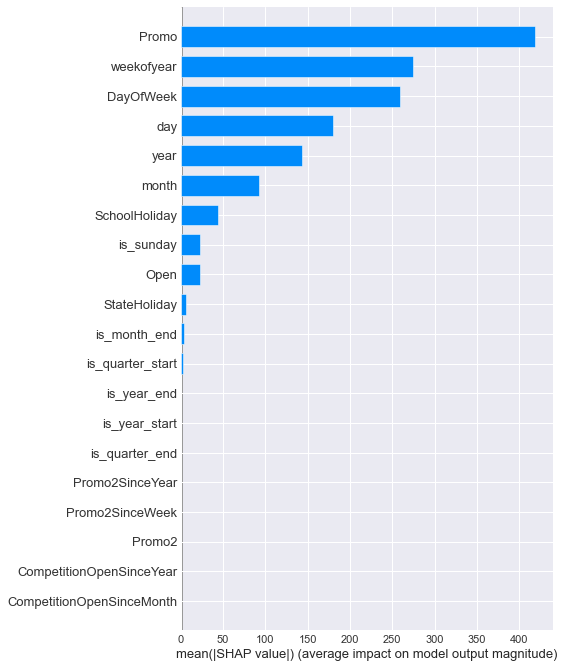

In [63]:
shap.summary_plot(shap_values, X_train[X_train.Store == 1].drop('Store', axis = 1), plot_type="bar")

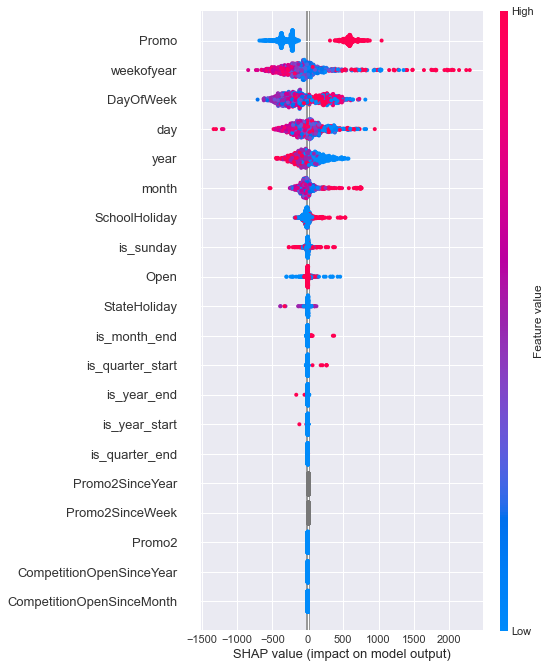

In [64]:
shap.summary_plot(shap_values,  X_train[X_train.Store == 1].drop('Store', axis = 1))

In [65]:
error_metric_list = []
for store in train_sales.Store.unique():
    
    try:
    
        dtrain = xgb.DMatrix(X_train[X_train.Store == store].drop('Store', axis = 1), y_train[y_train.Store == store].drop('Store', axis = 1).Sales)
        dtest = xgb.DMatrix(X_test[X_test.Store == store].drop('Store', axis = 1), y_test[y_test.Store == store].drop('Store', axis = 1).Sales)

        xgboost = xgb.train(param, dtrain, num_round, verbose_eval = False, )

        # make prediction
        preds = xgboost.predict(dtest)


        error = mean_absolute_percentage_error(y_test[y_test.Store == store].drop('Store', axis = 1).Sales, preds)
        print('Store :' , str(store), error)
        error_metric_list.append(error)
        
    except:
        print('Error in Modelling Store :' , str(store))
    

[20:04:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1 7.83167130928395
[20:04:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getti

Store : 14 7.681994865913214
[20:05:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 15 10.198049075401991
[20:05:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false a

[20:05:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 28 10.211699760670207
[20:05:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an

Store : 41 12.582967547195873
[20:05:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 42 12.512553035464336
[20:05:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 55 9.79409336364304
[20:05:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 56 11.14089441374168
[20:05:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false ala

Store : 69 9.11284721871673
[20:05:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 70 11.101554343681183
[20:05:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false al

Store : 84 10.159693312149102
[20:05:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 85 7.857876575977188
[20:05:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false a

Store : 99 13.266638185501526
[20:05:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 100 11.393948205348526
[20:05:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 114 9.775871651675498
[20:05:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 115 13.036304084687323
[20:05:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 128 11.100935287371042
[20:05:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 129 16.73159951740621
[20:05:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 142 10.119448098597172
[20:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 156 7.550567721076419
[20:05:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 157 7.982426433939563
[20:05:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:24] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 171 9.530247532171424
[20:05:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 172 6.476676019121993
[20:05:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 185 10.843416348351436
[20:05:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 186 10.548161435911057
[20:05:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

Store : 199 11.043624998529996
[20:05:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 200 13.415749836416543
[20:05:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:31] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

Store : 213 9.876740982912702
[20:05:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 214 9.850837284007524
[20:05:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 227 14.333314747815585
[20:05:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 228 8.896668343798913
[20:05:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 241 9.059772158398308
[20:05:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 242 10.926292325323898
[20:05:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 255 9.871705163736715
[20:05:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 256 13.877951630626567
[20:05:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:05:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 269 19.105327036621418
[20:05:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 283 12.256312658035707
[20:05:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 284 8.748526133831753
[20:05:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 297 8.087811857288237
[20:05:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 298 10.24284194712431
[20:05:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 312 10.128933502487792
[20:05:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 313 10.26222705189374
[20:05:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 327 10.337628022736903
[20:05:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 328 8.87082332493959
[20:05:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 341 9.987129298283486
[20:05:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 342 8.661228075743683
[20:05:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 355 8.65503518232669
[20:05:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 356 8.485565475245162
[20:05:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false a

Store : 369 8.784653775532236
[20:05:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 370 10.01709383317203
[20:05:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:05:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 383 6.812662240624932
[20:06:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 384 12.178439902668428
[20:06:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:06:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 397 11.04715228703208
[20:06:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an

Store : 411 11.770044367949527
[20:06:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 412 11.554124366366308
[20:06:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

[20:06:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 425 14.136901995123342
[20:06:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

[20:06:09] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 439 9.14753807370422
[20:06:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an 

Store : 453 16.79930363467242
[20:06:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 454 10.171359070920579
[20:06:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:06:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 468 14.363983386878044
[20:06:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 481 8.806674404327346
[20:06:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 482 9.800962830873445
[20:06:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:17] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

Store : 495 8.730323032203275
[20:06:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 496 10.855096526163114
[20:06:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:06:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 509 8.337103559971236
[20:06:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an

Store : 523 6.201511685866152
[20:06:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 524 10.947046737167263
[20:06:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:06:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 537 10.586431420325559
[20:06:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 550 35.184039191048846
[20:06:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 551 9.042755704497404
[20:06:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 564 9.044965053228838
[20:06:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 565 10.150462691087855
[20:06:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 578 9.4030547208016
[20:06:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 579 12.067897554909104
[20:06:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:32] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false a

[20:06:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 592 10.385651803388859
[20:06:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 605 11.661401850870682
[20:06:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 606 11.117068362296246
[20:06:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

Store : 632 8.335327088523476
[20:06:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 633 12.605690430408364
[20:06:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 647 8.308990644052546
[20:06:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:43] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 648 9.32729364142621
[20:06:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false a

[20:06:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 662 20.348691625079514
[20:06:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:46] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

[20:06:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 676 8.0920364566057
[20:06:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:48] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an i

Store : 689 10.111498757091331
[20:06:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 690 10.520685502857019
[20:06:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:51] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

Store : 704 8.628509447518999
[20:06:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 705 11.676885350744225
[20:06:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:53] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:06:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 719 14.828453250035437
[20:06:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:55] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 732 12.262840469278718
[20:06:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 733 8.910503364609475
[20:06:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:06:58] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:07:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 747 9.047818846138398
[20:07:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an

Store : 761 9.250763740144674
[20:07:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 762 16.533856353718722
[20:07:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:03] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

Store : 776 12.064664117035685
[20:07:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 777 12.19193024136124
[20:07:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:05] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:07:07] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 791 13.551063704169977
[20:07:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 804 11.035473851366596
[20:07:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 805 12.856216919740712
[20:07:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

[20:07:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 818 15.751208458770746
[20:07:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 832 9.381666545885107
[20:07:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 833 10.624991635123829
[20:07:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:14] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:07:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 846 10.47523946296296
[20:07:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:16] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an

Store : 860 12.575551110269037
[20:07:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 861 12.336628597037436
[20:07:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:19] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

Store : 874 9.548723937135074
[20:07:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 875 9.208107408681885
[20:07:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:21] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false 

[20:07:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 888 8.7631581754891
[20:07:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:23] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an i

Store : 902 21.641158496449574
[20:07:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 903 10.677706599241647
[20:07:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:26] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

Store : 916 14.427741799402588
[20:07:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 917 10.303183097634617
[20:07:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:28] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fals

[20:07:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 931 12.274616988155126
[20:07:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:30] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 945 8.98986599977734
[20:07:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 946 8.458639128307308
[20:07:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:33] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false a

Store : 959 6.660536023395307
[20:07:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 960 11.262590732843575
[20:07:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false

[20:07:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 974 7.441007919789723
[20:07:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters ge

Store : 988 10.3515958239144
[20:07:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 989 9.92195638667375
[20:07:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:40] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false al

Store : 1003 14.671954774803245
[20:07:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1004 11.210287192097887
[20:07:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:42] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fa

[20:07:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1017 8.004130776642072
[20:07:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:44] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

Store : 1031 10.388213805262206
[20:07:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1032 7.283892453876051
[20:07:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fal

[20:07:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1045 13.843512875109884
[20:07:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:49] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open 

[20:07:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1059 9.015184019697555
[20:07:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

[20:07:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1073 14.371748867613817
[20:07:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:54] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open 

Store : 1086 13.050659305260718
[20:07:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:56] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1087 8.029949635435397
[20:07:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a fal

[20:07:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1101 8.699639073348349
[20:07:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[20:07:59] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open a

[20:08:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Store : 1115 11.102210940113997


In [66]:
print(" Average MAPE across Stores is ", np.round(np.mean(error_metric_list), 2), "%")

 Average MAPE across Stores is  10.91 %


## Analysis

- Using SARIMAX, we could get an average MAPE of 26.4%, but this does not use any of the esxogenous and endogenous variables.
- Using XGBoost, we could get an average MAPE of 10.91%.
- From the XGBoost model, by using Shapley values, we can figure that, Promo, weekofyear and DayOfWeek play a important role in predicitng sales for the store.

## Scope of Improvement

- Using More time related features from a package named "tsfeatures"
- Tweaking the model better and using the Customers variable in predicting Sales.